<a href="https://colab.research.google.com/github/eleshuk/machine_learning/blob/main/eleshuk_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Create a script to train a regression model to predict the response variable "quality" given the available explanatory variables for the Wine Quality data set (https://archive.ics.uci.edu/dataset/186/wine+quality) that contains 4898 examples.

In [4]:
from google.colab import drive
import pandas as pd
import zipfile
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
# Mount drive to access zip folder in google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
file_path = "/content/drive/My Drive/wine+quality.zip"
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()
print(file_list)

['winequality-red.csv', 'winequality-white.csv', 'winequality.names']


In [7]:
zip_path = file_path
extract_to = "wine_quality_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [8]:
# Look at white wine first, that's the dataset that has 4898 examples
df = pd.read_csv("wine_quality_data/winequality-white.csv", sep = ';')
# df.head()

predict the response variable "quality" given the available explanatory variables for the Wine Quality data set

In [9]:
# PyTorch expects numeric data in float32 (for continuous data) - we have a pandas df rn bc of the way that we read in the data

# Define features (X) and target (y)
features = df.drop(columns=["quality"])  # Drop target variable
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

y_df = df["quality"]  # Target variable

In [10]:
# Convert features to a PyTorch tensor
X = torch.tensor(X_scaled.astype(np.float32))
y = torch.tensor(y_df.astype(np.float32))
y = y.view(y.shape[0], 1)

In [11]:
# Define number of samples and features
n_samples, n_features = X.shape
# input size - number of features (11)
# output size - quality (1)

In [12]:
# Linear model f = wx + b
input_size = n_features
output_size = 1 # (quality)
model = nn.Linear(input_size, output_size)
model

Linear(in_features=11, out_features=1, bias=True)

In [13]:
# Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
# 3) Training loop
num_epochs = 100

# Create list to hold loss values
loss_history = []

for epoch in range(num_epochs):

    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    # Store loss
    loss_history.append(loss.item())

    if (epoch+1) % 10 == 0: # % 10 == 0: triggers an action every 10 epochs.
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 23.9324
epoch: 20, loss = 16.1754
epoch: 30, loss = 11.0106
epoch: 40, loss = 7.5633
epoch: 50, loss = 5.2595
epoch: 60, loss = 3.7186
epoch: 70, loss = 2.6871
epoch: 80, loss = 1.9962
epoch: 90, loss = 1.5330
epoch: 100, loss = 1.2220


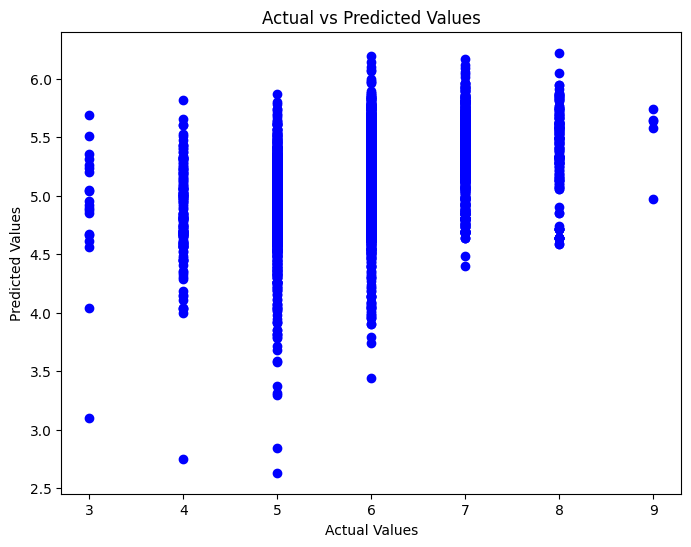

In [15]:
predicted = model(X).detach().numpy()
plt.figure(figsize=(8,6))
plt.scatter(y, predicted, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
# plt.ylim(0)
plt.show()

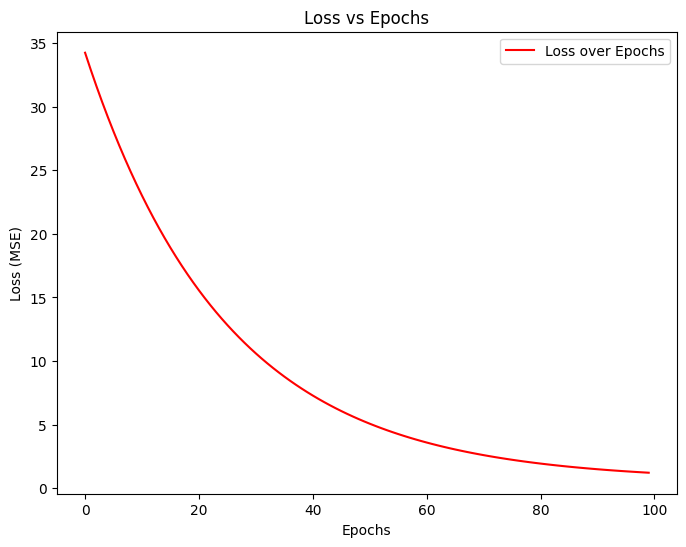

In [16]:
# Plot Loss vs Epochs
plt.figure(figsize=(8, 6))
plt.plot(range(num_epochs), loss_history, label="Loss over Epochs", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()